<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Praktikum07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Ujicoba PK7"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv(path + '/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [ ]:
# Cek Duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [ ]:
# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename (columns={
    'Gender' : 'jenis_kelamin',
    'Parent_income' : 'pemasukan',
    'IQ' : 'iq',
    'Encourage' : 'menganjurkan',
    'Plan' : 'rencana'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   jenis_kelamin  8000 non-null   object
 2   pemasukan      8000 non-null   int64 
 3   iq             8000 non-null   int64 
 4   menganjurkan   8000 non-null   object
 5   rencana        8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


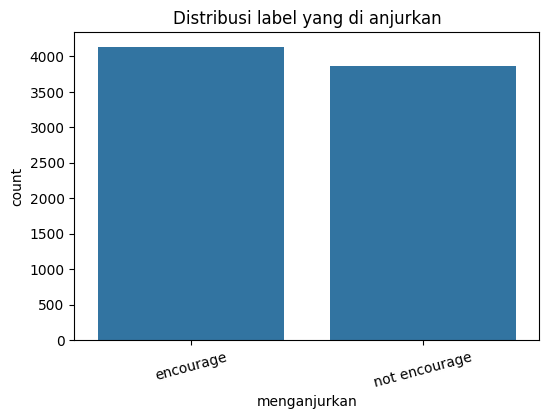

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot( x='menganjurkan', data=df )
plt.title('Distribusi label yang di anjurkan')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# mapping label -> kode untuk target
stunting_cat = df['menganjurkan'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)  # urutan kelas
df['menganjurkan'] = stunting_cat.cat.codes               # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'rencana']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,StudentID,jenis_kelamin,pemasukan,iq,menganjurkan,rencana,manganjurkan
0,4558,1,53900,118,0,1,0
1,4561,0,24900,87,1,0,1
2,4563,0,65800,93,1,0,1
3,4565,1,11440,117,0,1,0
4,4567,0,16700,102,1,0,1


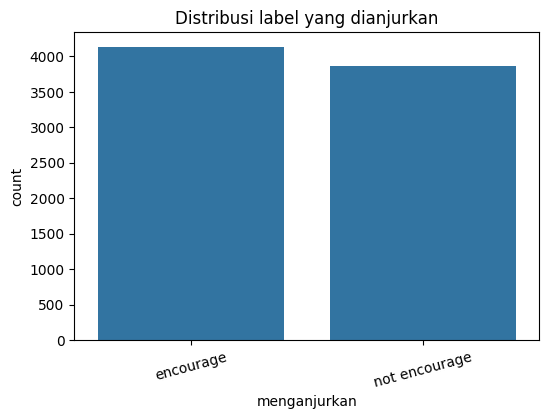

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot( x='menganjurkan', data=df )
plt.title('Distribusi label yang dianjurkan')
plt.xticks(rotation=15)
plt.show()

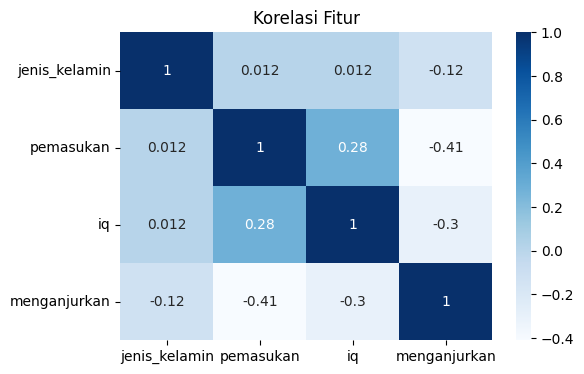

In [ ]:
# Korelasi
plt.figure(figsize=(6,4))
# Exclude the 'rencana' column from correlation calculation as it's the target variable
sns.heatmap(df[['jenis_kelamin', 'pemasukan', 'iq', 'menganjurkan']].corr(), annot=True, cmap='Blues')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
# Memilih fitur dan target
feature_cols = ['jenis_kelamin', 'pemasukan', 'iq', 'rencana']
X = df[feature_cols]
y = df['menganjurkan']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

len(X_train), len(X_test)

(6400, 1600)

In [ ]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Evaluasi
y_pred = dt.predict(X_test)

# Redefine stunting_classes to ensure it's available
stunting_cat = df['menganjurkan'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)

print("Akurasi:", round(accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred
    ))

Akurasi: 1

Confusion Matrix:
 [[544 283]
 [ 85 688]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75       827
           1       0.71      0.89      0.79       773

    accuracy                           0.77      1600
   macro avg       0.79      0.77      0.77      1600
weighted avg       0.79      0.77      0.77      1600



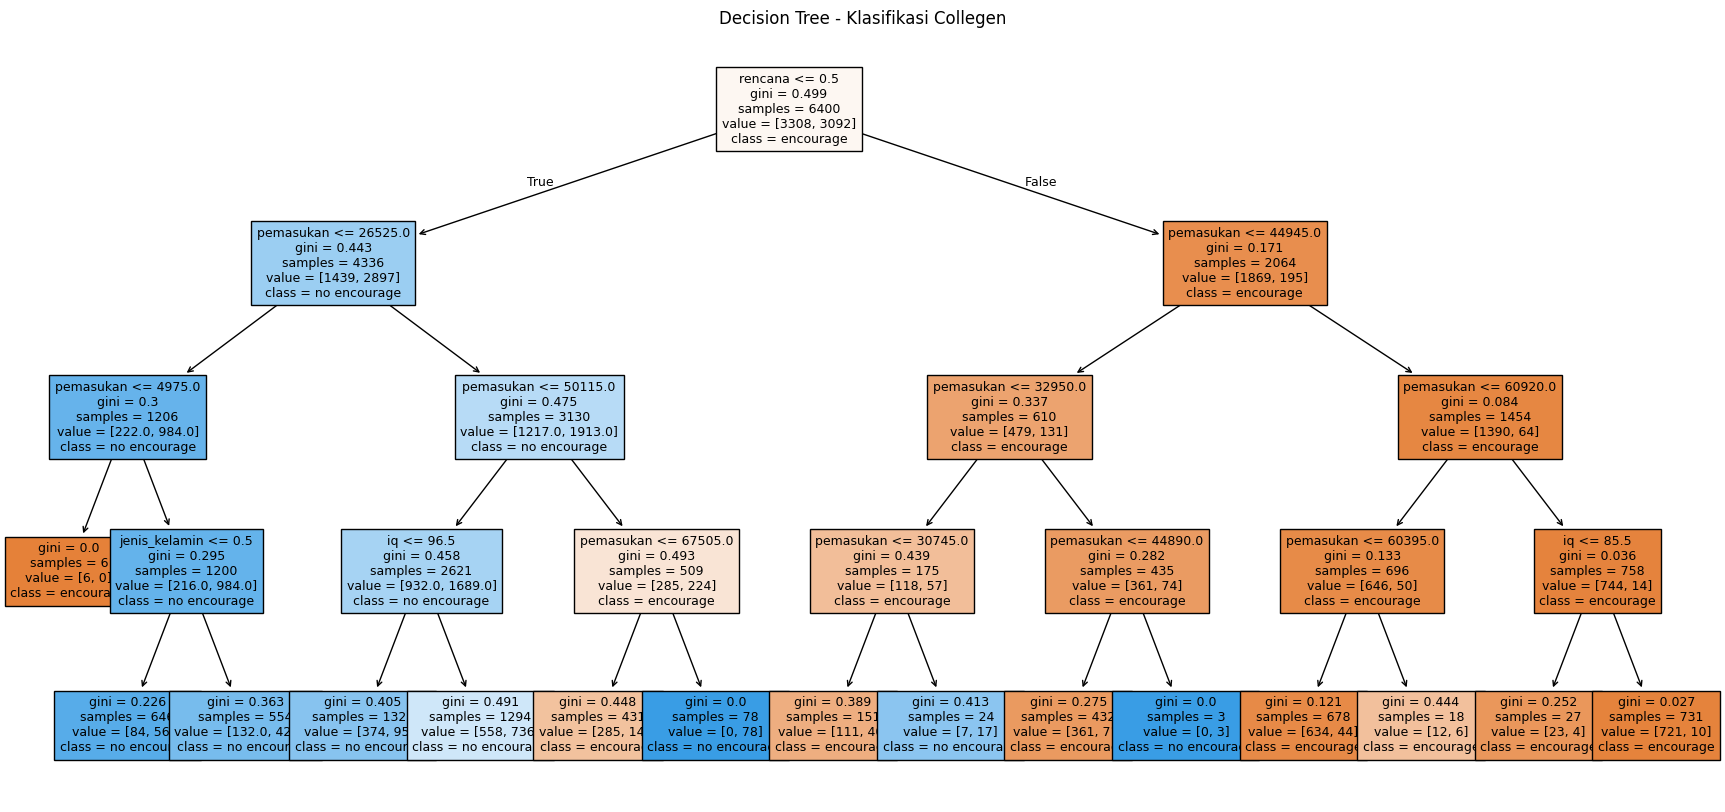

In [ ]:
# Visualisasi model
plt.figure(figsize=(22,10))

# Provide the original string class names directly
menganjurkan_classes_original = ['encourage', 'no encourage']

plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=menganjurkan_classes_original,  # use the original string class names
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Collegen")
plt.show()

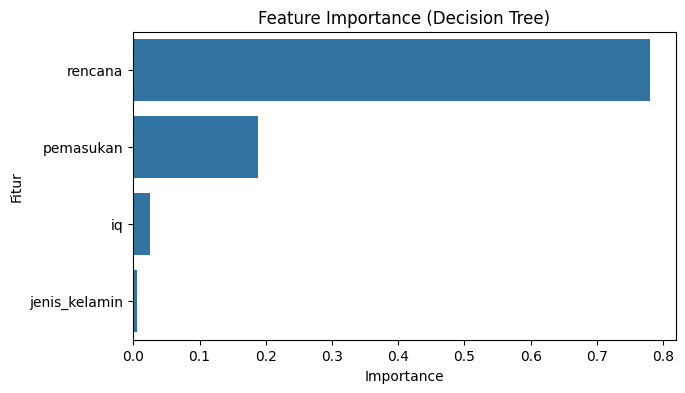

,0
rencana,0.780035
pemasukan,0.188462
iq,0.025580
jenis_kelamin,0.005923


In [ ]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [ ]:
scores = {}
for d in range(2, 9+1):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 5 | Acc: 77.12 %
